In [1]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
# Importing data
df = pd.read_csv('data/train.csv')

In [3]:
df.head(10)

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Male,23.170309,1.707557,75.306702,yes,2.303367,1.277636,Sometimes,no,3.042774,Sometimes,yes,no,0.944982,0.366126,Public_Transportation,Body Level 3
1,Female,39.965474,1.739293,80.914382,yes,2.416044,1.352649,Sometimes,no,3.196043,Sometimes,no,no,0.148628,1.082660,Automobile,Body Level 3
2,Female,19.000000,1.650000,56.000000,yes,3.000000,3.000000,Frequently,yes,3.000000,Frequently,yes,yes,1.000000,2.000000,Public_Transportation,Body Level 2
3,Female,18.297229,1.637396,70.000000,yes,2.000000,2.326165,no,no,1.999014,Sometimes,yes,no,0.007050,0.000000,Public_Transportation,Body Level 3
4,Male,18.701766,1.704908,81.384224,yes,2.650629,1.708083,Sometimes,no,1.000000,Sometimes,yes,no,1.876051,0.938791,Public_Transportation,Body Level 3
5,Male,30.200946,1.755926,112.289883,yes,2.317734,2.152736,no,no,3.000000,Sometimes,yes,no,0.000000,1.108145,Automobile,Body Level 4
6,Female,34.369686,1.652202,77.133220,yes,2.595128,1.642251,no,no,1.619796,Sometimes,yes,no,0.662831,0.999268,Automobile,Body Level 3
7,Male,36.673882,1.792100,101.285765,yes,2.222282,2.791604,Sometimes,no,1.578751,Sometimes,yes,no,2.352091,0.317846,Automobile,Body Level 4
8,Female,41.743333,1.678610,79.849252,yes,2.733129,1.302594,no,no,3.000000,Sometimes,yes,no,0.000000,1.103349,Automobile,Body Level 3
9,Female,18.024744,1.617192,83.121811,yes,2.976509,1.022705,no,no,3.000000,Sometimes,yes,no,1.025690,0.313016,Public_Transportation,Body Level 4


In [4]:
# Check for null values and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1033 non-null   object 
 1   Age                 1033 non-null   float64
 2   Height              1033 non-null   float64
 3   Weight              1033 non-null   float64
 4   H_Cal_Consump       1033 non-null   object 
 5   Veg_Consump         1033 non-null   float64
 6   Water_Consump       1033 non-null   float64
 7   Alcohol_Consump     1033 non-null   object 
 8   Smoking             1033 non-null   object 
 9   Meal_Count          1033 non-null   float64
 10  Food_Between_Meals  1033 non-null   object 
 11  Fam_Hist            1033 non-null   object 
 12  H_Cal_Burn          1033 non-null   object 
 13  Phys_Act            1033 non-null   float64
 14  Time_E_Dev          1033 non-null   float64
 15  Transport           1033 non-null   object 
 16  Body_L

In [6]:
# Get a summary of numerical features.
df.describe()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev
count,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,24.273712,1.702666,86.305256,2.428403,2.000652,2.680538,1.031515,0.649803
std,6.376439,0.093934,26.239851,0.543237,0.616888,0.798427,0.836129,0.601642
min,15.000000,1.456346,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.816228,1.630000,65.000000,2.000000,1.543021,2.658478,0.184917,0.000000
50%,22.720449,1.701650,83.000000,2.449267,2.000000,3.000000,1.000000,0.616045
75%,26.000000,1.772045,106.421042,3.000000,2.462916,3.000000,1.683497,1.000000
max,55.246250,1.980000,173.000000,3.000000,3.000000,4.000000,3.000000,2.000000


Body Level 4    472
Body Level 3    284
Body Level 1    142
Body Level 2    135
Name: Body_Level, dtype: int64

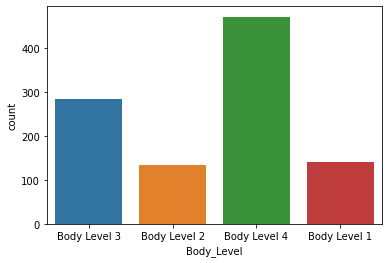

In [17]:
# Showing the distribution of the target variable.
sns.countplot(x='Body_Level', data=df)
df['Body_Level'].value_counts()

#### It is clear that the Body Level 4 class is over represented in the dataset

## Implementing the zeroR classifier
ZeroR is a simple classification algorithm that always predicts the majority class of the training data. It does not take into account the input features of the data and instead always outputs the same prediction.

In [7]:
# Last but not least, use a baseline. In this case, we used ZeroR.
blc = df['Body_Level'].value_counts()
blc = dict(blc)
max_label = None
max_value = 0
for key in blc.keys():
    if max_label is None:
        max_label = key
        max_value = blc[key]
        continue
    if blc[key] > max_value:
        max_label = key
        max_value = blc[key]
y_true = list(df['Body_Level'])
y_pred = [max_label] * len(df.index)

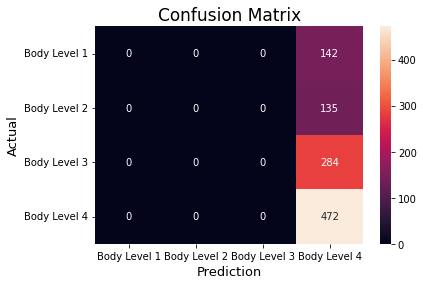

In [10]:
# Compute the confusion matrix.
cm = confusion_matrix(y_true,y_pred)
# Plot the confusion matrix.
labels = list(set(y_true))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

The above matrix goes with our expectations. The most represented class in the dataset is Body Level 4, thus zeroR always predicts Body Level 4

In [11]:
# Finding the accuracy.
accuracy = accuracy_score(y_true,y_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(y_true,y_pred)
print("Precision :", precision)
print("Recall    :", recall)
print("F1-score  :", F1_score)
print("Support  :", support)

Accuracy   : 0.4569215876089061
Precision : [0.         0.         0.         0.45692159]
Recall    : [0. 0. 0. 1.]
F1-score  : [0.         0.         0.         0.62724252]
Support  : [142 135 284 472]


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Applying the zeroR classifier to the validation set

In [12]:
df_val = pd.read_csv('data/val.csv')
y_true = list(df_val['Body_Level'])
y_pred = [max_label] * len(df_val.index)

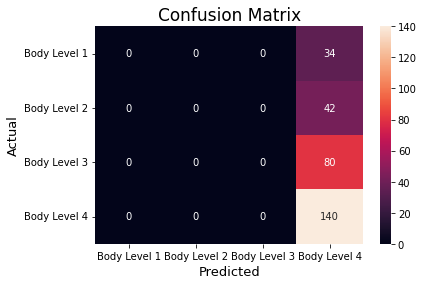

In [13]:
# Compute the confusion matrix.
cm = confusion_matrix(y_true,y_pred)
# Plot the confusion matrix.
labels = list(set(y_true))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [14]:
# Finding the accuracy.
accuracy = accuracy_score(y_true,y_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(y_true,y_pred)
print("Precision :", precision)
print("Recall    :", recall)
print("F1-score  :", F1_score)
print("Support  :", support)

Accuracy   : 0.47297297297297297
Precision : [0.         0.         0.         0.47297297]
Recall    : [0. 0. 0. 1.]
F1-score  : [0.         0.         0.         0.64220183]
Support  : [ 34  42  80 140]


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
